In [10]:
from aruco_classes import *

In [11]:
from scipy.spatial.transform import Rotation as R
import numpy as np
from skimage import io
import cv2
from utils import eulerAnglesToRotationMatrix, rotationMatrixToEulerAngles


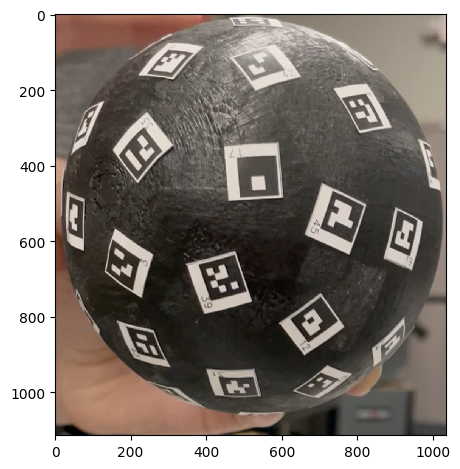

In [12]:
IMG_FILE_PATH = 'calib/from_video/im10.png'
marker_frame = io.imread(IMG_FILE_PATH)
# convert to grayscale
io.imshow(marker_frame)

In [13]:
np.info(marker_frame)

class:  ndarray
shape:  (1114, 1034, 4)
strides:  (4136, 4, 1)
itemsize:  1
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x1181e8000
byteorder:  little
byteswap:  False
type: uint8


In [14]:
vis = ArucoVision()
marker_orientations = vis.get_marker_orientations(marker_frame)

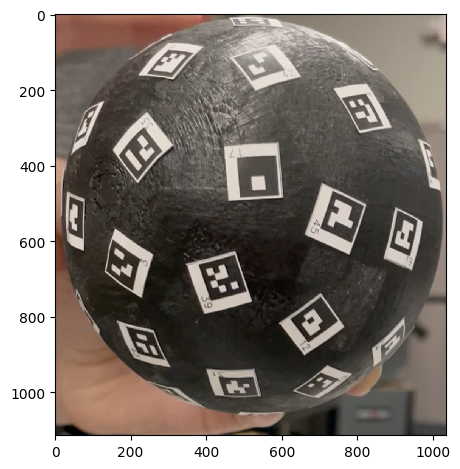

In [15]:
io.imshow(marker_frame)

type of gray img is <class 'numpy.ndarray'>
number of rejected points is 31
rejected points are (array([[[158., 566.],
        [262., 637.],
        [231., 754.],
        [130., 683.]]], dtype=float32), array([[[ 392.,  933.],
        [ 533.,  932.],
        [ 551., 1017.],
        [ 419., 1018.]]], dtype=float32), array([[[159., 808.],
        [263., 831.],
        [308., 937.],
        [206., 916.]]], dtype=float32), array([[[ 32., 467.],
        [ 80., 490.],
        [ 76., 627.],
        [ 32., 599.]]], dtype=float32), array([[[365., 103.],
        [309., 166.],
        [244., 158.],
        [301.,  94.]]], dtype=float32), array([[[381., 214.],
        [405., 237.],
        [441., 327.],
        [420., 311.]]], dtype=float32), array([[[113., 242.],
        [ 79., 322.],
        [ 54., 340.],
        [ 83., 259.]]], dtype=float32), array([[[ 974.,  342.],
        [ 992.,  355.],
        [1013.,  437.],
        [ 995.,  427.]]], dtype=float32), array([[[514., 427.],
        [556., 42

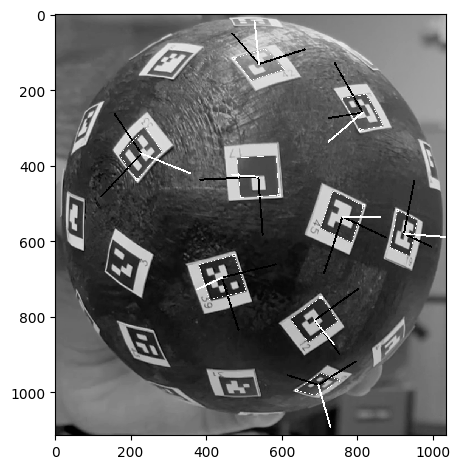

In [16]:
annotated_frame = vis.annotate_marker_image(marker_frame, square=False)
io.imshow(annotated_frame)

# 45, 17, 19

In [17]:
for id, rvec in marker_orientations:
    print(f"ID: {id}:\t{rvec}")

ID: 39:	[[-2.3704885 ]
 [-1.85300398]
 [-0.12269224]]
ID: 45:	[[1.379087  ]
 [1.98143412]
 [0.6550227 ]]
ID: 12:	[[-2.52933858]
 [-1.41506452]
 [-1.05844612]]
ID: 19:	[[-2.69208694]
 [-0.37156785]
 [-1.66542056]]
ID: 4:	[[-1.72175171]
 [ 2.18793298]
 [ 1.44671396]]
ID: 17:	[[0.07703299]
 [3.2125971 ]
 [0.14276003]]
ID: 49:	[[-2.00739737]
 [ 0.6961965 ]
 [-0.14558185]]
ID: 33:	[[-0.75043777]
 [ 1.60324347]
 [-0.07465091]]
ID: 42:	[[ 2.46786429]
 [-0.80745059]
 [ 0.51253796]]


In [18]:
marker_orientations_dict = {id: rvec for id, rvec in marker_orientations}

In [19]:
marker_orientations_dict[45], marker_orientations_dict[17]

(array([[1.379087  ],
        [1.98143412],
        [0.6550227 ]]),
 array([[0.07703299],
        [3.2125971 ],
        [0.14276003]]))

In [20]:
rot_vec_1 = marker_orientations_dict[45]
rot_vec_2 = marker_orientations_dict[17]
rot_vec_3 = marker_orientations_dict[19]

In [21]:
def get_euler_angle_from_rot_vec(vec):
    mat, jac = cv2.Rodrigues(vec)
    ob = R.from_matrix(mat)
    return ob.as_euler(seq='xyz', degrees=True)
    

In [22]:
get_euler_angle_from_rot_vec(rot_vec_1)

array([133.97580712,  12.29950522, 105.08342907])

In [23]:
get_euler_angle_from_rot_vec(rot_vec_2)


array([175.00975799,  -4.41924913, 177.44546923])

In [24]:
print(f'rot_vec_1: {rot_vec_1}')
print(f'rot_vec_2: {rot_vec_2}')
print(f'rot_vec_3: {rot_vec_3}')

rot_vec_1: [[1.379087  ]
 [1.98143412]
 [0.6550227 ]]
rot_vec_2: [[0.07703299]
 [3.2125971 ]
 [0.14276003]]
rot_vec_3: [[-2.69208694]
 [-0.37156785]
 [-1.66542056]]


In [25]:
mat_1, jac = cv2.Rodrigues(rot_vec_1)
mat_2, jac = cv2.Rodrigues(rot_vec_2)
mat_3, jac = cv2.Rodrigues(rot_vec_3)

In [26]:
mat_1

array([[-0.25425242,  0.6305407 ,  0.73333084],
       [ 0.94338611,  0.32870482,  0.04444984],
       [-0.21302195,  0.70311561, -0.67841734]])

In [27]:
def get_angle_diff_between_matrices(mat_1, mat_2):
    r_1_2 = np.transpose(mat_1) @ mat_2
    diff_angle = np.rad2deg(np.arccos((np.trace(r_1_2) - 1) / 2))
    return diff_angle

In [28]:
def checkMatrixEquality(mat1, mat2):
    print(['NOT equal', 'Matrices are equal.'][int(np.sum(mat1-mat2)<1e-6)])

In [29]:
def get_rotation_from_to(matrix_1, matrix_2):
    return matrix_1.T @ matrix_2

In [30]:
from utils import get_rotation_difference

In [31]:
get_rotation_difference(mat_1, mat_2)

array([[ 0.27875231,  0.90712803,  0.31530286],
       [-0.55925657,  0.42023358, -0.71458787],
       [-0.78072353,  0.02285783,  0.62445839]])

In [32]:
get_rotation_difference(mat_1, mat_1)

array([[ 1.00000000e+00,  5.01302549e-17, -2.56778913e-17],
       [ 5.01302549e-17,  1.00000000e+00,  5.39232706e-17],
       [-2.56778913e-17,  5.39232706e-17,  1.00000000e+00]])

In [33]:
mat_1_3_diff = mat_1.T @ mat_3
mat_1_2_diff = mat_1.T @ mat_2
mat_2_3_diff = mat_2.T @ mat_3

In [34]:
result1 = mat_1 @ mat_1_3_diff
not np.any(result1-mat_3 > 1e-8)

True

In [35]:
result2 = (mat_1 @ mat_1_2_diff) @ mat_2_3_diff
checkMatrixEquality(result2, mat_3)

Matrices are equal.


In [36]:
net_transform_1_3 = (mat_1_2_diff @ mat_2_3_diff)
eu_rad_angles = rotationMatrixToEulerAngles(net_transform_1_3)
eu_deg_angles = rad_to_deg(eu_rad_angles)
net_transform_1_3, eu_deg_angles

(array([[-0.08716225, -0.9949047 , -0.0506694 ],
        [ 0.95837548, -0.09762626,  0.26830124],
        [-0.27188083, -0.02517458,  0.96200159]]),
 [-1.4990285047654341, 15.776217841627538, 95.19663500003395])

In [37]:
result3 = mat_1 @ net_transform_1_3
checkMatrixEquality(result3, mat_3)

Matrices are equal.


In [38]:
diff_obj = R.from_matrix(mat_1_3_diff)
ang = diff_obj.as_euler(seq='xyz', degrees=True)
ang

array([-1.4990285 , 15.77621784, 95.196635  ])

In [91]:
testframe = io.imread('calib/test/test.png')

# testframe = io.imread('aruco/aru_output/marker25.png')
# testframe = cv2.cvtColor(testframe, cv2.COLOR_GRAY2BGR)

testframe

array([[[166, 157, 142],
        [156, 147, 132],
        [146, 137, 124],
        ...,
        [101, 104, 101],
        [145, 148, 145],
        [157, 160, 157]],

       [[165, 156, 141],
        [159, 150, 135],
        [152, 143, 130],
        ...,
        [101, 104, 101],
        [126, 129, 126],
        [128, 131, 128]],

       [[163, 154, 139],
        [160, 151, 136],
        [156, 147, 134],
        ...,
        [110, 113, 110],
        [121, 124, 121],
        [118, 121, 118]],

       ...,

       [[176, 177, 148],
        [181, 182, 153],
        [184, 185, 156],
        ...,
        [141, 100,  70],
        [145, 104,  76],
        [148, 107,  79]],

       [[178, 179, 150],
        [181, 182, 153],
        [183, 184, 155],
        ...,
        [142, 101,  71],
        [145, 104,  76],
        [150, 109,  81]],

       [[181, 182, 153],
        [179, 180, 151],
        [178, 179, 150],
        ...,
        [142, 101,  71],
        [147, 106,  78],
        [150, 109,  81]]

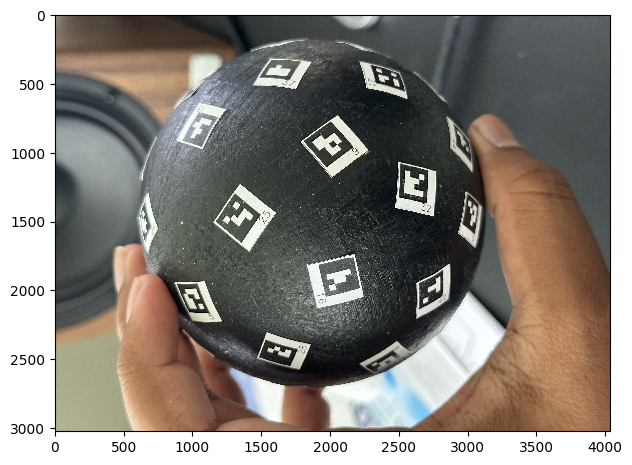

In [92]:
io.imshow(testframe)

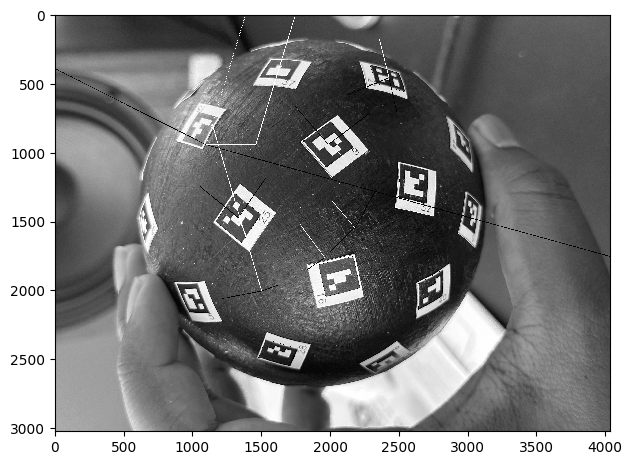

In [93]:
ARUCO_DICT = aruco.getPredefinedDictionary(aruco.DICT_4X4_250)
MARKER_SIZE = 0.02
# https://stackoverflow.com/questions/75750177
def my_estimatePoseSingleMarkers(corner_locations, camera_matrix, distortion_coeffs):
    '''
    This will estimate the rvec and tvec for each of the marker corners detected by:
    corners, ids, rejectedImgPoints = detector.detectMarkers(image)
    corners - is an array of detected corners for each detected marker in the image
    marker_size - is the size of the detected markers
    mtx - is the camera matrix
    distortion - is the camera distortion matrix
    RETURN list of rvecs, tvecs, and trash (so that it corresponds to the old estimatePoseSingleMarkers())
    '''
    
    marker_points = np.array([[-MARKER_SIZE / 2, MARKER_SIZE / 2, 0],
                                [MARKER_SIZE / 2, MARKER_SIZE / 2, 0],
                                [MARKER_SIZE / 2, -MARKER_SIZE / 2, 0],
                                [-MARKER_SIZE / 2, -MARKER_SIZE / 2, 0]], dtype=np.float32)
    trash = []
    rvecs = []
    tvecs = []
    
    for c in corner_locations:
        nada, R, t = cv2.solvePnP(marker_points, c, camera_matrix, distortion_coeffs, False, cv2.SOLVEPNP_IPPE_SQUARE)
        rvecs.append(R)
        tvecs.append(t)
        trash.append(nada)
    return rvecs, tvecs, trash

# Load calibration data
camera_matrix = np.load('cam_properties/camera_matrix.npy')
dist_coeffs = np.load('cam_properties/dist_coeffs.npy')
# Define the aruco dictionary and charuco board
parameters = cv2.aruco.DetectorParameters()
detector = cv2.aruco.ArucoDetector(ARUCO_DICT, parameters)
# change frame to grayscale
frame = cv2.cvtColor(testframe, cv2.COLOR_BGR2GRAY)  

# lists of ids and the corners beloning to each id
corners, ids, rejected_img_points = detector.detectMarkers(image=frame)

# if there are markers found by detector:
if np.all(ids is not None):  
    
    # iterate over each marker
    for i in range(0, len(ids)):  
        # Estimate pose of each marker and return the values rvec and tvec -- different from camera coefficients
        rvec, tvec, _ = my_estimatePoseSingleMarkers([corners[i]], camera_matrix, dist_coeffs)
        
        # Draw a square around the markers
        aruco.drawDetectedMarkers(frame, corners)  
        
        # Draw Axis
        rvec = np.array(rvec)
        tvec = np.array(tvec)
        frame = cv2.drawFrameAxes(frame, camera_matrix, dist_coeffs, rvec, tvec,0.03)
        
# Display the resulting frame
io.imshow(frame)

In [94]:
marker_orientations = dict(vis.get_marker_orientations(testframe))

In [95]:
orien = marker_orientations[25]

In [96]:
mat, _  = cv2.Rodrigues(orien)
mat

array([[ 0.60873495, -0.79322511,  0.01535208],
       [-0.78104428, -0.60256088, -0.16398237],
       [ 0.1393255 ,  0.08783115, -0.9863438 ]])

In [100]:
correction = np.array(eval("""[[ 0.57648861,  0.20160011,  0.79184485],
[-0.22252206, -0.89372345,  0.38954118],
[ 0.78622186, -0.400769  , -0.47036092]]""")).T

In [101]:
rad_to_deg(rotationMatrixToEulerAngles(mat@correction))

[-42.527764262983524, 43.07890778788056, -73.84965744347008]